In [1]:
import os
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
sp_short = pd.read_csv("../data/raw/SP500.csv")
sp_long = pd.read_csv("../data/raw/SP500F.csv")

In [3]:
sp_short["DATE"] = pd.to_datetime(sp_short["DATE"])
sp_long["DATE"] = pd.to_datetime(sp_long["DATE"])

In [4]:
for i in range(len(sp_short["SP500"])):
    try:
        sp_short.loc[i, "SP500"] = float(sp_short.loc[i, "SP500"])
    except:
        sp_short.loc[i, "SP500"] = np.NaN

In [5]:
combined_df = pd.concat([sp_long, sp_short], keys="DATE", ignore_index=True)

In [6]:
combined_df = combined_df.loc[1300:, :]

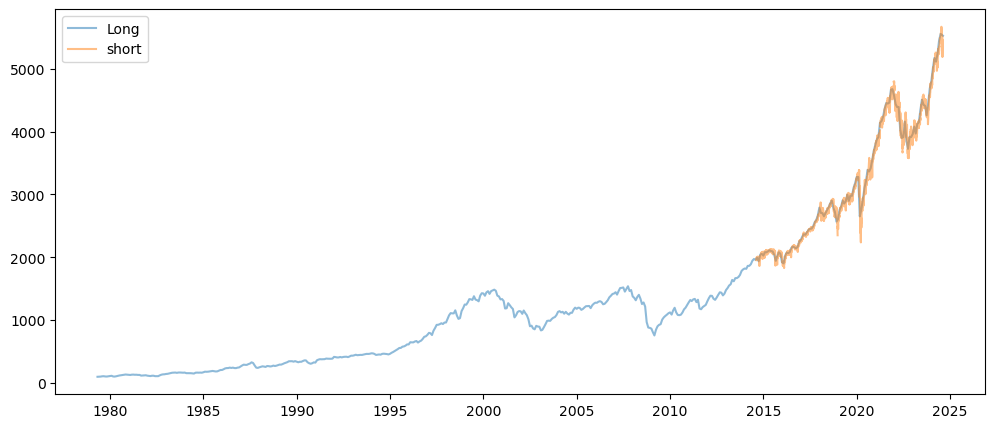

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(combined_df["DATE"], combined_df["SP500_full"], alpha=0.5, label="Long")
plt.plot(combined_df["DATE"], combined_df["SP500"], alpha=0.5, label="short")
plt.legend()
plt.show();